## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

## Import dataset

In [2]:
data = pd.read_csv(r"C:\Users\User\Downloads\Compressed\archive_10\heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Checking for missing values

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Checking for Duplicate Values

In [5]:
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
data = data.drop_duplicates()

In [7]:
data.duplicated().any()

False

## Data Processing

In [8]:
cate_val = []
cont_val = []

for column in data.columns:
    if data[column].nunique() <= 10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [9]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [10]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

## Encoding Categorical Data

In [11]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [12]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data, columns = cate_val, drop_first = True)

In [13]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


## Feature Scaling

In [14]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [17]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


## Splitting The Dataset Into The Training Set And Test Set

In [18]:
# Independent variables
X = data.drop('target', axis = 1)
X

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,-0.661712,-0.687083,-1.511859,0.394086,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
733,-1.153610,0,-1.346085,-2.041893,1.112172,-0.382092,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
843,0.506972,1,1.619532,0.512893,-1.074521,-0.899544,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [19]:
y = data['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.2, random_state = 42)

## Logistic Regression

In [22]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred1 = log.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score 

In [27]:
accuracy_score(y_test, y_pred1)

0.7868852459016393

## Support Vector Classifier (SVC)

In [28]:
from sklearn import svm

In [29]:
svm = svm.SVC()

In [30]:
svm.fit(X_train, y_train)

SVC()

In [31]:
y_pred2 = svm.predict(X_test)

In [32]:
accuracy_score(y_test, y_pred2)

0.8032786885245902

## KNeighbors Classifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [34]:
X_test_array = X_test.values if isinstance(X_test, pd.DataFrame) else X_test

In [35]:
kn = KNeighborsClassifier()

In [36]:
kn.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
y_pred3 = kn.predict(X_test_array)

C:\Users\User\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [38]:
accuracy_score(y_test, y_pred3)

0.7377049180327869

In [40]:
score = []

for k in range(1, 40):
    kn = KNeighborsClassifier(n_neighbors = k)
    kn.fit(X_train, y_train)
    y_pred = kn.predict(X_test_array)
    score.append(accuracy_score(y_test, y_pred))

C:\Users\User\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with f

In [41]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [43]:
kn = KNeighborsClassifier(n_neighbors = 2)
kn.fit(X_train, y_train)
y_pred = kn.predict(X_test_array)
accuracy_score(y_test, y_pred)

C:\Users\User\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8032786885245902

## Non-Linear ML Algorithms

In [44]:
# With non linear ML algorithms there is no need for preprocessing like encoding and feature scaling
data = pd.read_csv(r"C:\Users\User\Downloads\Compressed\archive_10\heart.csv")

In [46]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [47]:
data = data.drop_duplicates()

In [48]:
data.shape

(302, 14)

In [49]:
X = data.drop('target', axis = 1)
y = data['target']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dt = DecisionTreeClassifier()

In [53]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
y_pred4 = dt.predict(X_test)

In [59]:
accuracy_score(y_test, y_pred4)

0.7540983606557377

## Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf = RandomForestClassifier()

In [62]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
y_pred5 = rf.predict(X_test)

In [64]:
accuracy_score(y_test, y_pred5)

0.8524590163934426

## Gradient Boosting Classifier

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
gbc = GradientBoostingClassifier()

In [68]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [69]:
y_pred6 = gbc.predict(X_test)

In [70]:
accuracy_score(y_test, y_pred6)

0.8032786885245902

In [75]:
final_data = pd.DataFrame({'Models':['LR', 'SVM', 'KNN', 'DT', 'RF', 'GB'],
                          'ACC':[accuracy_score(y_test, y_pred1),
                                 accuracy_score(y_test, y_pred2),
                                 accuracy_score(y_test, y_pred3),
                                 accuracy_score(y_test, y_pred4),
                                 accuracy_score(y_test, y_pred5),
                                 accuracy_score(y_test, y_pred6)]})

In [76]:
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.754098
4,RF,0.852459
5,GB,0.803279


In [77]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

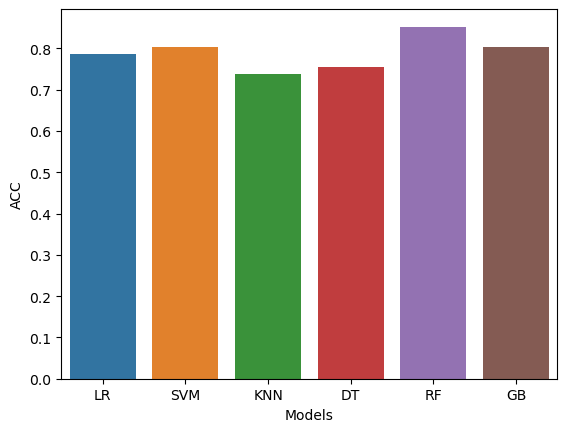

In [79]:
sns.barplot(x = final_data['Models'], y= final_data['ACC'])

In [80]:
X = data.drop('target', axis = 1)
y = data['target']

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier()

## Prediction on New Data

In [84]:
import pandas as pd

In [86]:
new_data = pd.DataFrame({
    'age': 52,
    'sex': 1,
    'cp': 0,
    'trestbps': 125,
    'chol': 212,
    'fbs': 0,
    'restecg': 1,
    'thalach': 168,
    'exang': 0,
    'oldpeak': 1.0,
    'slope': 2,
    'ca': 2,
    'thal': 3
    
}, index=[0])

In [87]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [89]:
p = rf.predict(new_data)

if p[0] == 0:
    print('No disease')
else:
    print('Disease')

No disease


## Save model using Joblib

In [90]:
import joblib

In [91]:
joblib.dump(rf, 'model_joblib_heart')

['model_joblib_heart']

In [92]:
model = joblib.load('model_joblib_heart')

In [93]:
model.predict(new_data)

array([0], dtype=int64)

## GUI

In [97]:
from tkinter import *
import joblib

In [99]:
def show_entry_fields():
    p1 = int(e1.get())
    p2 = int(e2.get())
    p3 = int(e3.get())
    p4 = int(e4.get())
    p5 = int(e5.get())
    p6 = int(e6.get())
    p7 = int(e7.get())
    p8 = int(e8.get())
    p9 = int(e9.get())
    p10 = float(e10.get())
    p11 = int(e11.get())
    p12 = int(e12.get())
    p13 = int(e13.get())
    model = joblib.load('model_joblib_heart')
    result = model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text = 'No heart disease').grid(row=31)
    else:
        Label(master, text = 'Possiblity of heart disease').grid(row=31)
    

master = Tk()
master.title('Heart Disease Prediction System')

label = Label(master, text = 'Heart Disease Prediction System', bg = 'black',
             fg = 'white').grid(row = 0, columnspan = 2)

Label(master, text = 'Enter your age: ').grid(row = 1)
Label(master, text = 'Male or Female [1/0]: ').grid(row = 2)
Label(master, text = 'Enter value of CP: ').grid(row = 3)
Label(master, text = 'Enter value of trestbps: ').grid(row = 4)
Label(master, text = 'Enter value of chol: ').grid(row = 5)
Label(master, text = 'Enter value of fbs: ').grid(row = 6)
Label(master, text = 'Enter value of restecg: ').grid(row = 7)
Label(master, text = 'Enter value of thalach: ').grid(row = 8)
Label(master, text = 'Enter value of exang: ').grid(row = 9)
Label(master, text = 'Enter value of oldpeak: ').grid(row = 10)
Label(master, text = 'Enter value of slope: ').grid(row = 11)
Label(master, text = 'Enter value of ca: ').grid(row = 12)
Label(master, text = 'Enter value of thal: ').grid(row = 13)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row = 1, column = 1)
e2.grid(row = 2, column = 1)
e3.grid(row = 3, column = 1)
e4.grid(row = 4, column = 1)
e5.grid(row = 5, column = 1)
e6.grid(row = 6, column = 1)
e7.grid(row = 7, column = 1)
e8.grid(row = 8, column = 1)
e9.grid(row = 9, column = 1)
e10.grid(row = 10, column = 1)
e11.grid(row = 11, column = 1)
e12.grid(row = 12, column = 1)
e13.grid(row = 13, column = 1)

Button(master, text = 'Predict', command = show_entry_fields).grid()


mainloop()

C:\Users\User\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
